In [98]:
# Read the dataset

import pandas as pd

apps_with_duplicates = pd.read_csv('apps.csv')

# Drop all duplicates

apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps in the dataset
print('Total number of apps in the dataset: ', len(apps))

# Print the first rows
apps.head()

Total number of apps in the dataset:  9659


App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite â€“ FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size     Installs  Type Price Content Rating  \
0      159   19M      10,000+  Free     0       Everyone   
1      967   14M     500,000+  Free     0       Everyone   
2    87510  8.7M   5,000,000+  Free     0       Everyone   
3   215644   25M  50,000,000+  Free     0           Teen   
4      967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

### Cleaning the Dataset

In [99]:
# Drop the apps that have Size = Varies with device
apps = apps.set_index('Size')
apps = apps.drop('Varies with device', axis = 0)
apps = apps.reset_index()

In [100]:
# Convert the rows in Size that are in kilobytes to megabytes and delete k
def convert_size(size):
    if type(size) == float or type(size) == int:
        return x
    if 'k' in size:
        if len(size) > 1:
            return float(size.replace('k', '')) * 0.001 
    if 'M' in size:
        if len(size) > 1:
            return float(size.replace('M', ''))
        
apps['Size'] = apps['Size'].apply(convert_size)

In [101]:
# We will clean the special characters of Price($) and Installs(, and +)
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of the columns to clean
columns_to_clean = ['Installs', 'Price']

# Loop for each column
for col in columns_to_clean:
    # Loop for each character to clean
    for char in chars_to_remove:
        apps[col] = apps[col].str.replace(char, '')
    # Convert the column to numeric once is clean
    apps[col] = pd.to_numeric(apps[col])

### Exploring App categories

Number of categories =  33


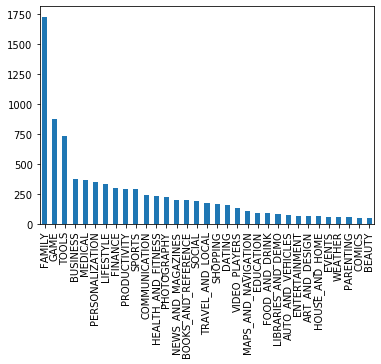

In [108]:
import matplotlib.pyplot as plt

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them in descending order
num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

# Plot the number of apps per category
num_apps_in_category.plot(kind='bar', x = num_apps_in_category.index, y = num_apps_in_category.values)

### Distribution of App ratings

The average of App rating is:  4.160623310089655


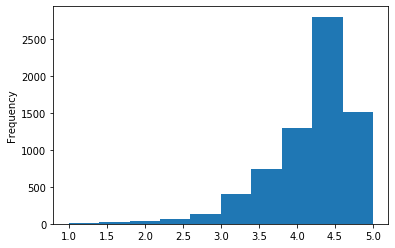

In [109]:
# Take the mean of Apps Rating
avg_app_rating = apps['Rating'].mean()
print('The average of App rating is: ', avg_app_rating)

# Plot a histogram of Apps acording to their ratings
apps['Rating'].plot(kind = 'hist')

### Size and Price of an App

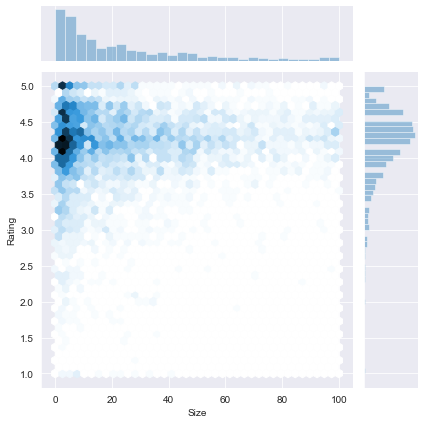

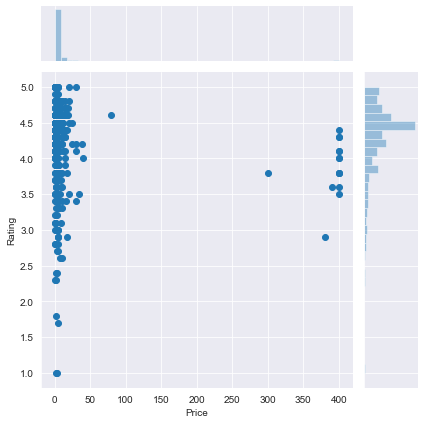

In [118]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Subset for categories with at least 250 apps
large_categories = apps.groupby(apps['Category']).filter(lambda x: len(x) >= 250).reset_index()

# Plot Size vs. Rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Subset out apps whose type is 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

### Relation between App category and App price

Category                                App   Price
2541     FAMILY             most expensive app (H)  399.99
2666  LIFESTYLE                         ðŸ’Ž I'm rich  399.99
2670  LIFESTYLE           I'm Rich - Trump Edition  400.00
3520  LIFESTYLE                          I am rich  399.99
3522     FAMILY                     I am Rich Plus  399.99
3523  LIFESTYLE                      I am rich VIP  299.99
3524    FINANCE                  I Am Rich Premium  399.99
3525  LIFESTYLE                I am extremely Rich  379.99
3526    FINANCE                         I am Rich!  399.99
3527    FINANCE                 I am rich(premium)  399.99
3530     FAMILY                      I Am Rich Pro  399.99
3532    FINANCE     I am rich (Most expensive app)  399.99
3534     FAMILY                          I Am Rich  389.99
3537    FINANCE                          I am Rich  399.99
3541    FINANCE                 I AM RICH PRO PLUS  399.99
7588    FINANCE                        Eu Sou Rico  394.99
7604  LIFESTYLE  I'm Rich/Eu sou Rico/Ø£Ù†Ø§ ØºÙ†ÙŠ/æˆ‘å¾ˆæœ‰éŒ¢  399.99

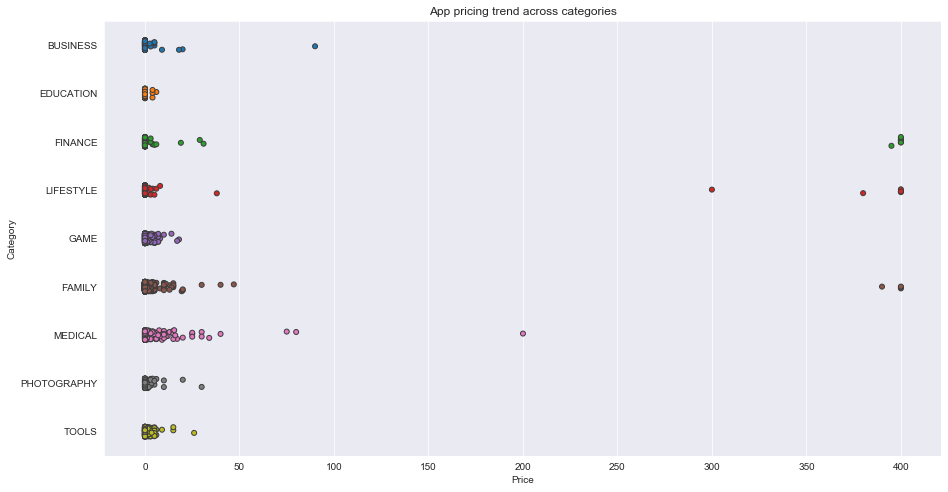

In [119]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS', 'EDUCATION'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
apps_above_200

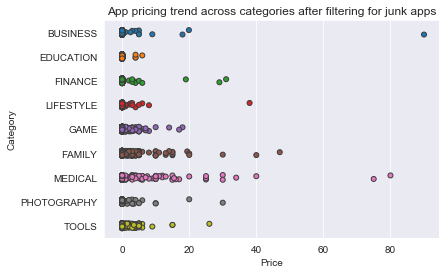

In [121]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

# Apps with higher prices are joke apps, so, let's reduce the price to 100fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100,
                   jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

### Popularity of Paid Apps vs Free Apps

Text(0.5, 1.0, 'Free vs Paid Apps')

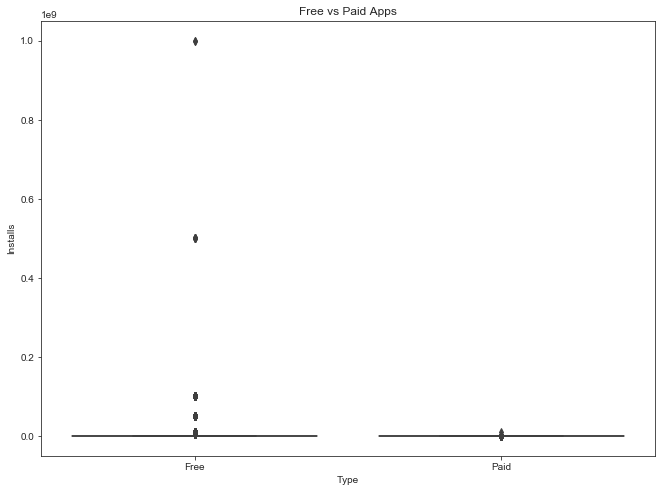

In [137]:
# Paid Apps
#paid = apps[apps['Type'] == 'Paid']['Installs']

# Free Apps
#free = apps[apps['Type'] == 'Free']['Installs']

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Free apps vs paid Apps
ax = sns.boxplot(x = 'Type', y = 'Installs', data = apps)
ax.set_title('Free vs Paid Apps')

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

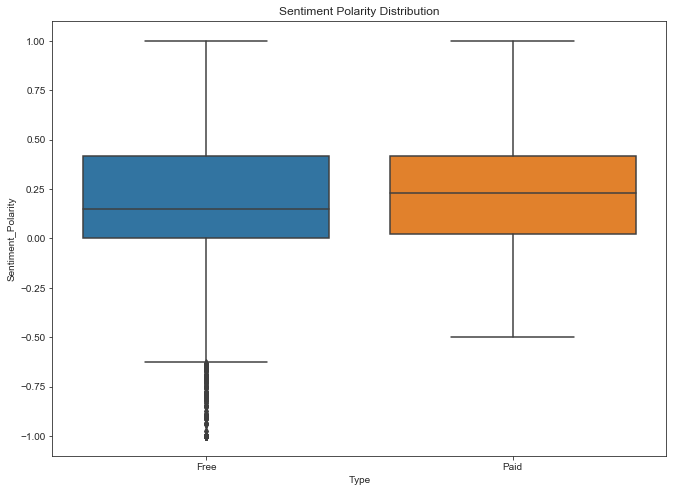

In [131]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join and merge the 2 Dataframes
merged_df = pd.merge(apps, reviews_df, on = 'App', how = 'inner')

# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')